In [1]:
import time
import numpy as np
import torch
torch.autograd.set_grad_enabled(False)
# torch.cuda.set_device(0)

In [2]:
# !git clone --depth 1 https://github.com/Hzzone/torch_clustering
# import sys
# sys.path.insert(0, './torch_clustering')
!pip install munkres faiss-gpu

In [3]:
!nvidia-smi

Thu Jul 13 15:53:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A6000    Off  | 00000000:1B:00.0 Off |                  Off |
| 30%   47C    P2   130W / 300W |  38351MiB / 49140MiB |     99%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A6000    Off  | 00000000:1D:00.0 Off |                  Off |
| 30%   

In [4]:
from torch_clustering import PyTorchKMeans, FaissKMeans, PyTorchGaussianMixture, evaluate_clustering

In [5]:
# CIFAR-10 features 256d
# https://drive.google.com/file/d/1N3REtPr-A__KOtzRZenFSvRIEufW9j3A/view
# ImageNet features 256d
# https://drive.google.com/file/d/1UcUWw9o6Y6SrSFXOkNTVjCoEik79oUAo/view

In [6]:
!gdown --id 1N3REtPr-A__KOtzRZenFSvRIEufW9j3A -O cifar10_features.pth
# !gdown --id 1UcUWw9o6Y6SrSFXOkNTVjCoEik79oUAo -O imagenet_features.pth

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1N3REtPr-A__KOtzRZenFSvRIEufW9j3A
From (redirected): https://drive.google.com/uc?id=1N3REtPr-A__KOtzRZenFSvRIEufW9j3A&confirm=t&uuid=5fefc936-8549-4fcc-82b1-e6952de04dac
To: /opt/tta/AdaContrast/clustering/torch_clustering/cifar10_features.pth
100%|██████████████████████████████████████| 51.4M/51.4M [00:01<00:00, 36.7MB/s]


In [7]:
features_path = './cifar10_features.pth'
# features_path = '.imagenet_features.pth'
data = torch.load(features_path, map_location='cpu')
features, labels = data[:, :-1], data[:, -1]
features, labels = features.cuda().float(), labels.cuda().long()
features_numpy, labels_numpy = features.cpu().numpy(), labels.cpu().numpy()

In [10]:
labels

tensor([6, 9, 9,  ..., 9, 1, 1], device='cuda:0')

In [30]:
labels.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0')

In [14]:
from sklearn.manifold import TSNE
tsne_np = TSNE(n_components = 2).fit_transform(features_numpy)

In [23]:
import pandas as pd

In [24]:
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

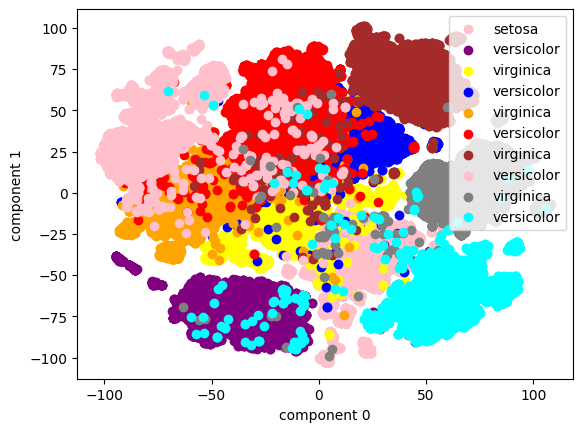

In [31]:
import matplotlib.pyplot as plt
# class target 정보 불러오기 
tsne_df['target'] = labels_numpy

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]
tsne_df_3 = tsne_df[tsne_df['target'] == 3]
tsne_df_4 = tsne_df[tsne_df['target'] == 4]
tsne_df_5 = tsne_df[tsne_df['target'] == 5]
tsne_df_6 = tsne_df[tsne_df['target'] == 6]
tsne_df_7 = tsne_df[tsne_df['target'] == 7]
tsne_df_8 = tsne_df[tsne_df['target'] == 8]
tsne_df_9 = tsne_df[tsne_df['target'] == 9]


# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'virginica')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'blue', label = 'versicolor')
plt.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'], color = 'orange', label = 'virginica')
plt.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'], color = 'red', label = 'versicolor')
plt.scatter(tsne_df_6['component 0'], tsne_df_6['component 1'], color = 'brown', label = 'virginica')
plt.scatter(tsne_df_7['component 0'], tsne_df_7['component 1'], color = 'pink', label = 'versicolor')
plt.scatter(tsne_df_8['component 0'], tsne_df_8['component 1'], color = 'gray', label = 'virginica')
plt.scatter(tsne_df_9['component 0'], tsne_df_9['component 1'], color = 'cyan', label = 'versicolor')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
plt.scatter(tsne_np[:,0], tsne_df_0['component 1'], color = 'pink', label = 'setosa')
plt.scatter(tsne_np[:,0], tsne_np[:,0], color = 'purple', label = 'versicolor')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [11]:
kwargs = {
    'metric': 'cosine',  # euclidean if not l2_normalize
    'distributed': False,
    'random_state': 0,
    'n_clusters': int(labels_numpy.max() + 1),
    'verbose': False
}

In [12]:
clustering_model = PyTorchKMeans(init='k-means++', max_iter=300, tol=1e-4, **kwargs)
psedo_labels = clustering_model.fit_predict(features)
evaluate_clustering(labels.cpu().numpy(), psedo_labels.cpu().numpy(), eval_metric=['nmi', 'acc'], phase='train')

{'train_nmi': 0.8551917177300477, 'train_acc': 0.92368}

In [16]:
# !pip install -U faiss
# import faiss
# clustering_model = FaissKMeans(n_init=5, max_iter=50, **kwargs)
# psedo_labels = clustering_model.fit_predict(features_numpy, device=0)
# evaluate_clustering(labels.cpu().numpy(), psedo_labels.cpu().numpy(), eval_metric=['nmi', 'acc'], phase='train')

In [17]:
clustering_model = PyTorchGaussianMixture(covariance_type='diag', reg_covar=1e-6, init='k-means++', **kwargs)
psedo_labels = clustering_model.fit_predict(features)
evaluate_clustering(labels.cpu().numpy(), torch.argmax(psedo_labels, dim=1).cpu().numpy(), eval_metric=['nmi', 'acc'])

{'train_nmi': 0.8558679855654124, 'train_acc': 0.92382}

In [18]:
n_times = 10
all_times = []
for i in range(n_times):
    st = time.time()
    PyTorchKMeans(init='k-means++', max_iter=300, tol=1e-4, **kwargs).fit_predict(features)
    all_times.append(time.time() - st)
np.mean(all_times), np.std(all_times)

(4.020476770401001, 0.4481616560882192)

In [20]:
# all_times = []
# for i in range(n_times):
#     st = time.time()
#     FaissKMeans(n_init=5, max_iter=50, **kwargs).fit_predict(features_numpy, device=0)
#     all_times.append(time.time() - st)
# np.mean(all_times), np.std(all_times)

In [ ]:
all_times = []
for i in range(n_times):
    st = time.time()
    PyTorchGaussianMixture(covariance_type='diag', reg_covar=1e-6, init='k-means++', **kwargs).fit_predict(features)
    all_times.append(time.time() - st)
np.mean(all_times), np.std(all_times)